<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/Stats_Initial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Data can be pulled from http://people.bath.ac.uk/jjf23/LMR/python/lmrcsv.zip

In [1]:
!wget http://people.bath.ac.uk/jjf23/LMR/python/lmrcsv.zip
!mkdir data
!mv lmrcsv.zip ./data/
% cd ./data
!unzip lmrcsv.zip

--2019-07-17 05:31:06--  http://people.bath.ac.uk/jjf23/LMR/python/lmrcsv.zip
Resolving people.bath.ac.uk (people.bath.ac.uk)... 138.38.44.31
Connecting to people.bath.ac.uk (people.bath.ac.uk)|138.38.44.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161544 (158K) [application/zip]
Saving to: ‘lmrcsv.zip’

lmrcsv.zip          100%[===================>] 157.76K   349KB/s    in 0.5s    

2019-07-17 05:31:07 (349 KB/s) - ‘lmrcsv.zip’ saved [161544/161544]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [0]:
pima = pd.read_csv("/content/data/data/pima.csv")

In [9]:
pima.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
pima.describe().round(1)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


In [12]:
len(pima)

768

In [0]:
pima.replace({"diastolic": 0, "triceps": 0, "insulin": 0, "glucose": 0, "bmi":0}, np.nan, inplace=True)

In [14]:
pima.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [0]:
pima["test"] = pima["test"].astype("category")
pima["test"] = pima["test"].cat.rename_categories(["Negative", "Positive"])

In [16]:
pima["test"].describe()

count          768
unique           2
top       Negative
freq           500
Name: test, dtype: object

In [18]:
pima["test"].value_counts()

Negative    500
Positive    268
Name: test, dtype: int64

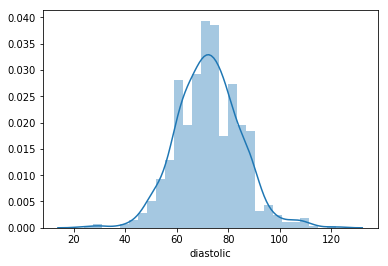

In [19]:
sns.distplot(pima.diastolic.dropna())

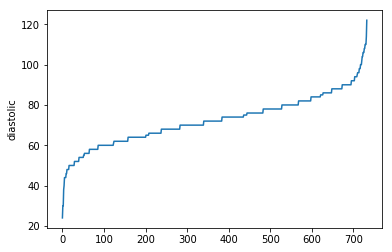

In [20]:
pimad = pima.diastolic.dropna().sort_values()
sns.lineplot(range(0, len(pimad)), pimad)

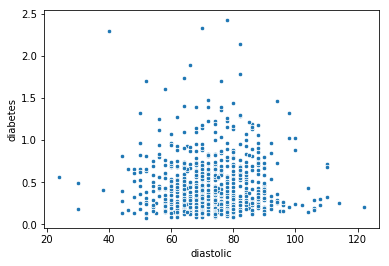

In [21]:
sns.scatterplot(x='diastolic', y='diabetes', data=pima, s=20)

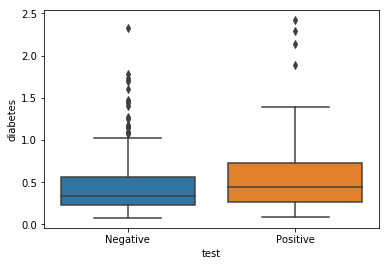

In [22]:
sns.boxplot(x="test", y="diabetes", data=pima)

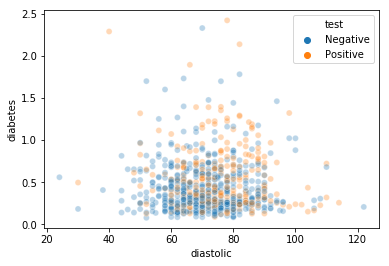

In [23]:
sns.scatterplot(x="diastolic", y="diabetes", data=pima, hue="test", alpha=0.3)

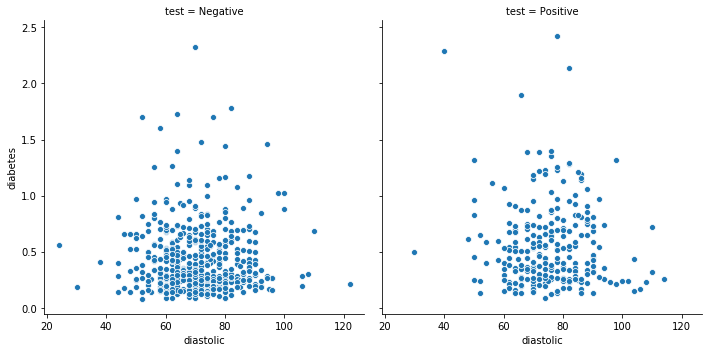

In [24]:
sns.relplot(x="diastolic", y="diabetes", data=pima, col="test")